# Talento Tech – Laboratorio OpenCV
By **Ing. Engler Gonzalez**

*Explicado línea por línea* —
Ejemplos:
- `coffee` (color),
- `camera` (gris),
- `page` (documento),
- `binary_blobs` (muchos objetos).  

In [1]:
# Descomenta si te falta alguna librería:
# !pip install -q opencv-python-headless scikit-image matplotlib

In [2]:
import cv2                      # (1) OpenCV: procesamiento de imágenes
import numpy as np              # (2) NumPy: matrices/arrays
import matplotlib.pyplot as plt # (3) Matplotlib: visualización
from skimage import data        # (4) Imágenes de ejemplo

def to_rgb(img):
    if img is None: return None              # (5) Evita errores si no hay imagen
    if img.ndim==3 and img.shape[2]==3:      # (6) Si es color (3 canales)...
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # (7) Convierte BGR->RGB para mostrar bien
    return img                                # (8) Si es gris, regresa igual

def show(imgs, titles=None, cmap=None, figsize=(14,4)):
    plt.figure(figsize=figsize)               # (9) Prepara figura
    for i,img in enumerate(imgs,1):           # (10) Recorre imágenes
        disp = to_rgb(img)                    # (11) Asegura RGB si hace falta
        plt.subplot(1,len(imgs),i)            # (12) Subplot
        if disp.ndim==2: plt.imshow(disp, cmap='gray' if cmap is None else cmap) # (13) Gris
        else: plt.imshow(disp)                # (14) Color
        if titles and i-1<len(titles): plt.title(titles[i-1])  # (15) Título
        plt.axis('off')                       # (16) Sin ejes
    plt.tight_layout(); plt.show()            # (17) Ajusta y muestra

Detectado Colab. Sube una o varias imágenes...


Saving 71664.webp to 71664.webp
Archivos subidos: ['71664.webp']
Usando el archivo subido: 71664.webp


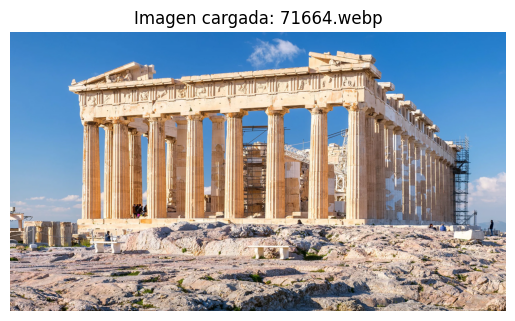

In [3]:
# (1) Subida en Colab
# - Ejecuta y aparecerá un selector de archivos.
# - Se cargan en el directorio de trabajo.
try:
    from google.colab import files  # type: ignore
    print("Detectado Colab. Sube una o varias imágenes...")
    up = files.upload()
    print("Archivos subidos:", list(up.keys()))
except Exception as e:
    print("No estás en Colab o módulo no disponible:", e)

# Opción B) Leer una imagen por ruta (Jupyter/Colab)
# Ejemplo: PATH_IMG = 'mi_foto.jpg'
# Usar el primer archivo subido si existe
if 'up' in locals() and len(up) > 0:
  PATH_IMG = list(up.keys())[0]
  print(f"Usando el archivo subido: {PATH_IMG}")
else:
  PATH_IMG = "/content" # Ruta por defecto si no se suben archivos

if PATH_IMG and PATH_IMG != "/content": # Evitar intentar leer el directorio /content
    from skimage import io
    try:
        img_user = io.imread(PATH_IMG)
        import matplotlib.pyplot as plt
        plt.imshow(img_user if img_user.ndim==3 else img_user, cmap='gray' if img_user.ndim==2 else None)
        plt.title(f"Imagen cargada: {PATH_IMG}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print("No se pudo leer la imagen:", e)
else:
    print("Define PATH_IMG con la ruta a una imagen para visualizarla.")


# # (2) Carga por ruta
# PATH_IMG = "/content/"
# if PATH_IMG:
#     img_bgr = cv2.imread(PATH_IMG, cv2.IMREAD_COLOR)    # (3) Lee en BGR
#     if img_bgr is None: print("No se pudo leer:", PATH_IMG)   # (4) Error
#     else: show([img_bgr], [f"Imagen cargada: {PATH_IMG}"])    # (5) Vista previa
# else:
#     print("Define PATH_IMG para usar tu foto.")

## 3) Cargar y visualizar — **coffee** (color)

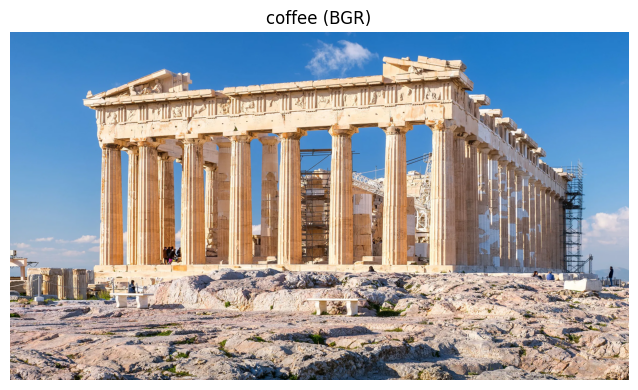

Forma: (1440, 2560, 3) | dtype: uint8


In [10]:
img_rgb = img_user                                  # (1) Carga 'coffee' (RGB)
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)       # (2) RGB->BGR (estilo OpenCV)
show([img_bgr], ["coffee (BGR)"])                        # (3) Muestra
print("Forma:", img_bgr.shape, "| dtype:", img_bgr.dtype)  # (4) Tamaño y tipo

## 4) Espacios de color — BGR→HSV (segmentación por color)

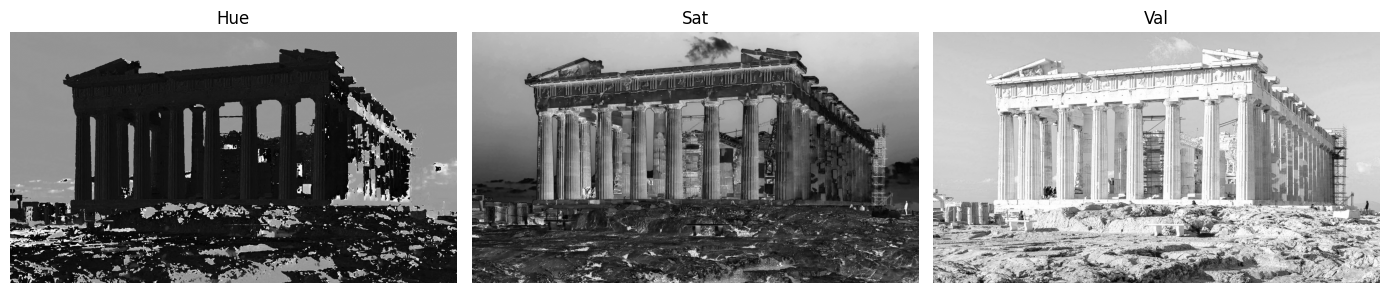

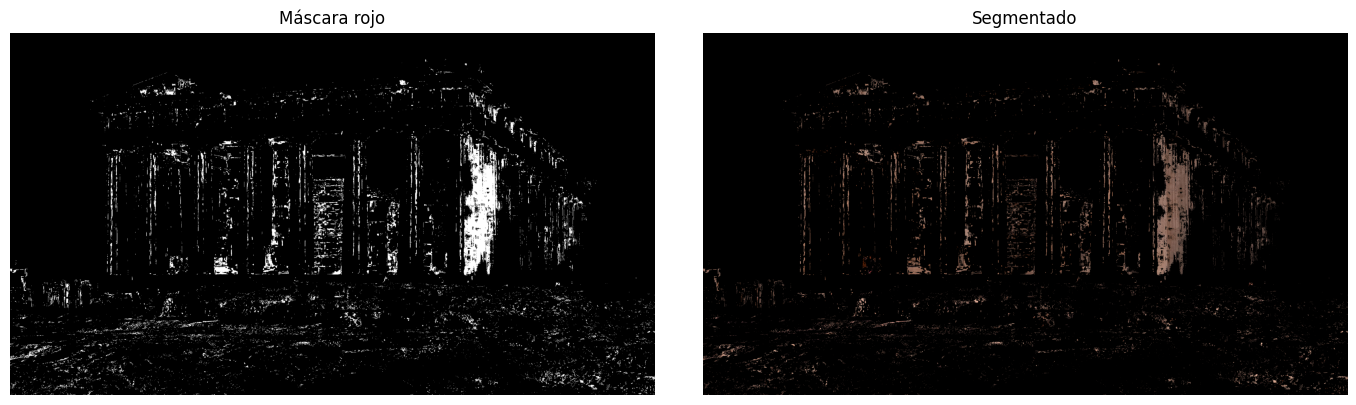

In [11]:
hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)           # (1) BGR->HSV
h, s, v = cv2.split(hsv)                                 # (2) Separa canales
show([h,s,v], ["Hue","Sat","Val"], cmap='gray')          # (3) Visualiza canales

# (4) Rojizos (dos rangos en Hue por la discontinuidad)
lower1 = np.array([0,70,50],  np.uint8); upper1 = np.array([10,255,255], np.uint8)
lower2 = np.array([170,70,50],np.uint8); upper2 = np.array([180,255,255],np.uint8)
mask = cv2.inRange(hsv, lower1, upper1) | cv2.inRange(hsv, lower2, upper2)  # (5) Unión de máscaras
seg  = cv2.bitwise_and(img_bgr, img_bgr, mask=mask)       # (6) Segmenta
show([mask, seg], ["Máscara rojo", "Segmentado"], cmap='gray')  # (7) Resultado

## 5) Grises, suavizado y bordes — **camera** (escena en gris)

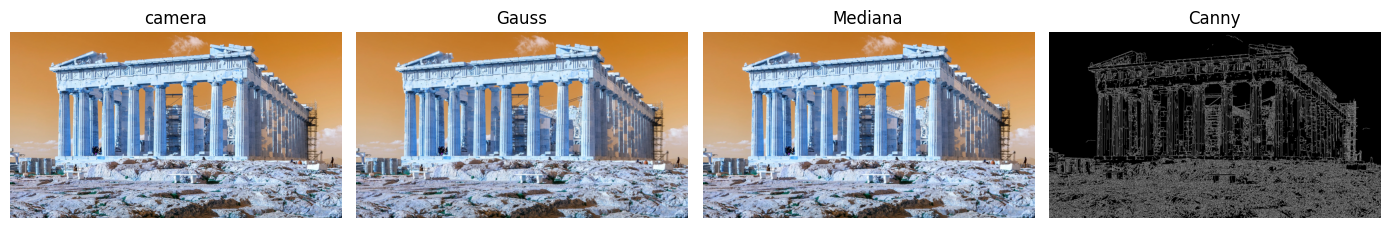

In [13]:
cam = img_user.astype(np.uint8)                     # (1) 'camera' en gris
gauss  = cv2.GaussianBlur(cam, (5,5), 1.5)               # (2) Suavizado Gaussiano
median = cv2.medianBlur(cam, 5)                          # (3) Suavizado Mediana
edges  = cv2.Canny(cam, 100, 200)                        # (4) Bordes Canny
show([cam, gauss, median, edges], ["camera","Gauss","Mediana","Canny"], cmap='gray')  # (5) Comparación

## 6) Contraste y umbrales — **page** (documento)

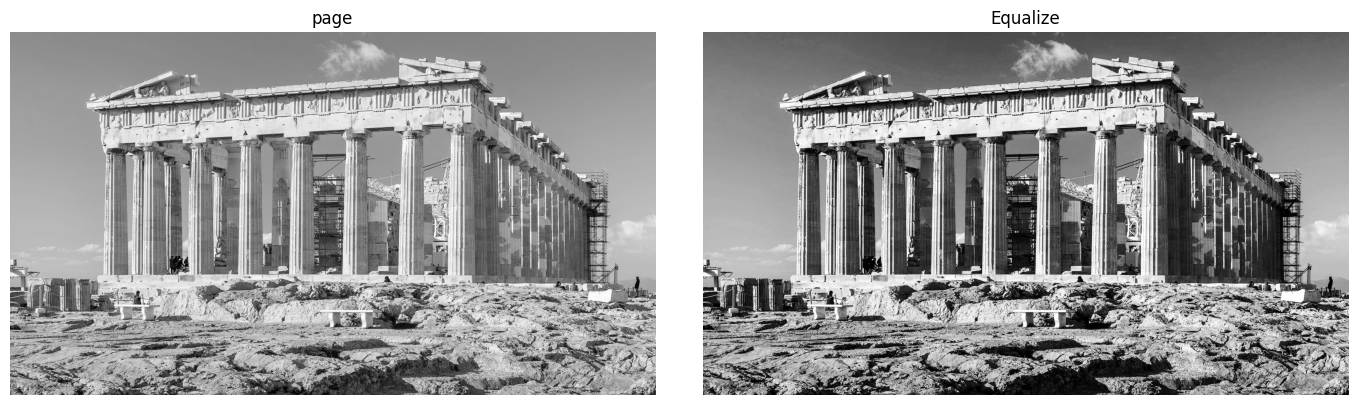

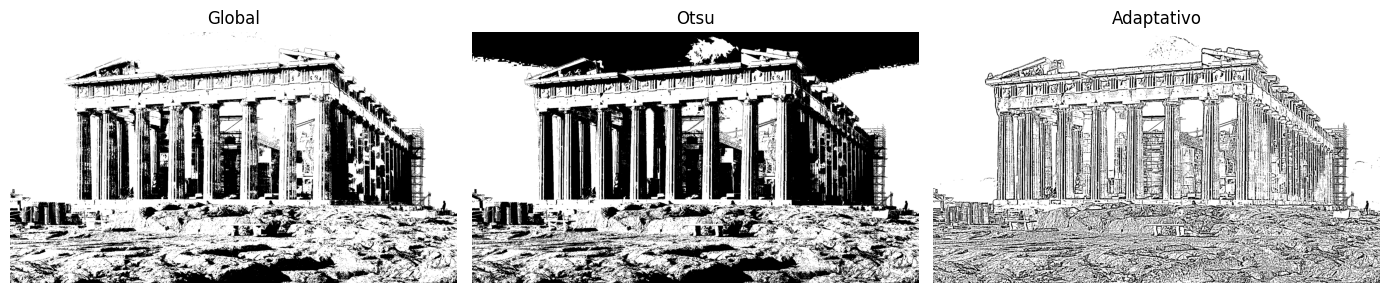

In [16]:
pg = cv2.cvtColor(img_user, cv2.COLOR_BGR2GRAY).astype(np.uint8) # Convert to grayscale and ensure uint8 type
eq = cv2.equalizeHist(pg)                                # (2) Contraste global
_, thg = cv2.threshold(pg,127,255,cv2.THRESH_BINARY)     # (3) Umbral global
_, tho = cv2.threshold(pg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)  # (4) Otsu
tha = cv2.adaptiveThreshold(pg,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,10) # (5) Adaptativo
show([pg, eq], ["page","Equalize"], cmap='gray')         # (6)
show([thg, tho, tha], ["Global","Otsu","Adaptativo"], cmap='gray')  # (7)

## 7) Morfología — limpiar la binaria del documento

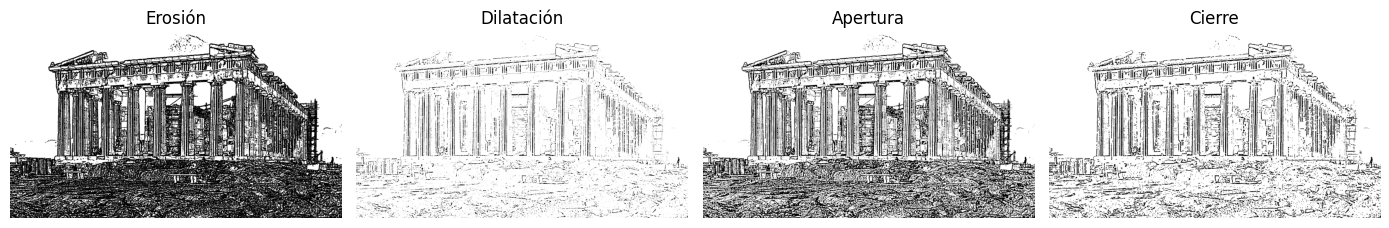

In [18]:
k = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))      # (1) Kernel 3x3
er  = cv2.erode(tha, k, 1)                                # (2) Erosión
di  = cv2.dilate(tha, k, 1)                               # (3) Dilatación
op  = cv2.morphologyEx(tha, cv2.MORPH_OPEN,  k, 1)        # (4) Apertura (quita ruido)
cl  = cv2.morphologyEx(tha, cv2.MORPH_CLOSE, k, 1)        # (5) Cierre (cierra huecos)
show([er, di, op, cl], ["Erosión","Dilatación","Apertura","Cierre"], cmap='gray')  # (6)

## 8) Contornos y conteo — **binary_blobs** (muchos objetos)

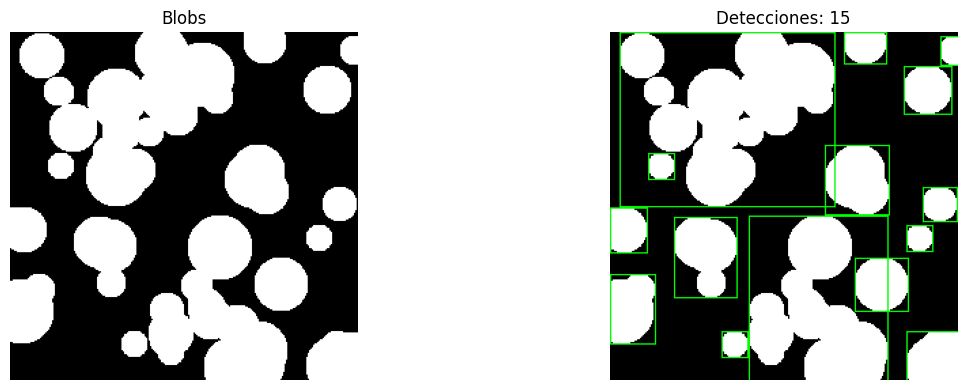

Objetos válidos: 15


In [19]:
# from skimage.data import binary_blobs
# blobs = (binary_blobs(length=256, seed=0)*255).astype(np.uint8)      # (1) Muchos objetos blancos

from skimage.draw import disk
blobs = np.zeros((256, 256), dtype=np.uint8)
for i in range(50): # Generar 50 círculos aleatorios
    r = np.random.randint(10, 25)
    cx, cy = np.random.randint(0, 256, 2)
    rr, cc = disk((cx, cy), r, shape=blobs.shape)
    blobs[rr, cc] = 255

cnts,_ = cv2.findContours(blobs, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # (2) Contornos externos
valid = [c for c in cnts if cv2.contourArea(c)>=20]                  # (3) Filtra por área mínima
draw  = cv2.cvtColor(blobs, cv2.COLOR_GRAY2BGR)                      # (4) A color para dibujar
for c in valid:                                                      # (5) Dibuja cajas
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(draw,(x,y),(x+w,y+h),(0,255,0),1)
show([blobs, draw], ["Blobs", f"Detecciones: {len(valid)}"], cmap='gray')
print("Objetos válidos:", len(valid))

## 9) Transformaciones y dibujo — sobre **coffee**

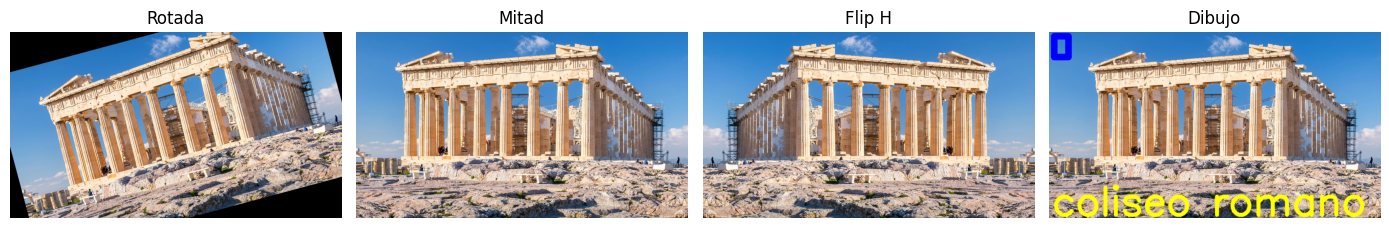

In [27]:
h,w = img_bgr.shape[:2]                                # (1) Alto y ancho
M   = cv2.getRotationMatrix2D((w/2,h/2),15,1.0)        # (2) Rotación 15°
rot = cv2.warpAffine(img_bgr,M,(w,h))                  # (3) Aplica rotación
res = cv2.resize(img_bgr,(w//2,h//2))                  # (4) Mitad de tamaño
flp = cv2.flip(img_bgr,1)                              # (5) Espejo horizontal
drw = img_bgr.copy()                                   # (6) Copia para dibujar
cv2.rectangle(drw,(40,40),(150,200),(255,0,0),50)       # (7) Rectángulo
cv2.putText(drw,"coliseo romano",(25,h-25),cv2.FONT_HERSHEY_SIMPLEX,10,(0,255,255),30) # (8) Texto
show([rot,res,flp,drw], ["Rotada","Mitad","Flip H","Dibujo"])  # (9)

## 10) CASO REAL — **Escáner de documentos** (foto → binario legible)

In [ ]:
src = data.page().astype(np.uint8)                     # (1) Documento en gris
scan = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,21,10) # (2) "Escáner" por zonas
k = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))    # (3) Kernel 3x3
scan_clean = cv2.morphologyEx(scan, cv2.MORPH_OPEN, k,1) # (4) Limpieza ligera
show([src, scan, scan_clean], ["Original","Binarizado","Binarizado limpio"], cmap='gray') # (5)

---
### OpenCV vs scikit-image (resumen)
- OpenCV: C/C++ (rápido), video/cámara/DNN, BGR & uint8.
- scikit-image: didáctico/científico, RGB & float.
- En Colab/Jupyter: visualizar con Matplotlib y convertir BGR→RGB.

## 12) Reto — Detección por color + conteo (ROJO con dos rangos)

In [ ]:
src_rgb = data.coffee(); src_bgr = cv2.cvtColor(src_rgb, cv2.COLOR_RGB2BGR)   # (1) Respaldo
hsv = cv2.cvtColor(src_bgr, cv2.COLOR_BGR2HSV)                                 # (2) HSV
l1,u1 = np.array([0,70,50],np.uint8),   np.array([10,255,255],np.uint8)        # (3) Rango 1
l2,u2 = np.array([170,70,50],np.uint8), np.array([180,255,255],np.uint8)       # (4) Rango 2
mask = cv2.inRange(hsv,l1,u1) | cv2.inRange(hsv,l2,u2)                         # (5) Unión de rangos
k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))                          # (6) Kernel
cl = cv2.morphologyEx(mask, cv2.MORPH_OPEN, k,1); cl = cv2.morphologyEx(cl, cv2.MORPH_CLOSE, k,1)   # (7) Limpieza
cnts,_ = cv2.findContours(cl, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)      # (8) Contornos
valid = [c for c in cnts if cv2.contourArea(c)>=100]                            # (9) Filtro por área
draw = src_bgr.copy()                                                           # (10) Dibujo
for c in valid:
    x,y,w,h = cv2.boundingRect(c)                                              # (11) Caja
    cv2.rectangle(draw,(x,y),(x+w,y+h),(0,255,0),2)                             # (12) Rectángulo
show([src_bgr, mask, cl, draw], ["Original","Máscara rojo","Limpia", f"Detecciones: {len(valid)}"])  # (13)
print("Objetos rojos válidos:", len(valid))                                    # (14)

## 12+1) Reto: ¡Personaliza tu foto!

El objetivo es que subas una foto y uses las funciones de dibujo de OpenCV para añadirle formas o texto.

**Instrucciones:**

1.  Sube una imagen usando el código de la sección 3 (la celda con el botón "Subir a Colab").
2.  Asegúrate de que la imagen se cargue correctamente y se muestre.
3.  En una nueva celda de código, utiliza la variable `img_user` (que contiene tu imagen cargada) y las funciones de dibujo de OpenCV, como `cv2.rectangle()`, `cv2.circle()`, `cv2.putText()`, etc., para añadir elementos a la imagen.
4.  Muestra la imagen modificada usando la función `show()` que ya está definida en el notebook.

¡Sé creativo y diviértete personalizando tu foto!

In [ ]:
# Aquí puedes empezar a escribir tu código para dibujar en la imagen subida (img_user)


# Ejemplo: Dibuja un rectángulo en la imagen


# Ejemplo: Añade texto a la imagen


# Recuerda mostrar la imagen modificada al final


## Guardar imagen

Usa `cv2.imwrite()` para guardar la imagen modificada.

In [ ]:
# Nombre del archivo para guardar
output_filename = "imagen_modificada.png"

# Prepara la imagen para guardar.
# Si la imagen es a color (3 canales), cv2.imwrite espera formato BGR.
# Si 'draw_img' es RGB (como las cargadas por skimage.io), conviértela a BGR.
# Las imágenes en escala de grises se guardan directamente.
if draw_img.ndim == 3 and draw_img.shape[2] == 3:
    img_to_save = cv2.cvtColor(draw_img, cv2.COLOR_RGB2BGR)
else:
    img_to_save = draw_img

# Guarda la imagen

# Puedes descargar el archivo desde el explorador de archivos de Colab.

## Ver la imagen guardada dentro del cuaderno

Carga la imagen que acabas de guardar y muéstrala usando la función `show()` para verificar los colores.

In [ ]:
# Cargar la imagen guardada
saved_img = cv2.imread(output_filename)

# Verificar si la imagen se cargó correctamente
if saved_img is not None:
    # Mostrar la imagen cargada usando la función show()